## Examine data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/mnt/c/Users/Szelestey/projects/loan-prediction-based-on-customer-behavior/data'

In [3]:
df_train = pd.read_csv(data_dir + '/train.csv')
df_test = pd.read_csv(data_dir + '/test.csv')
df_labels = pd.read_csv(data_dir + '/labels.csv')

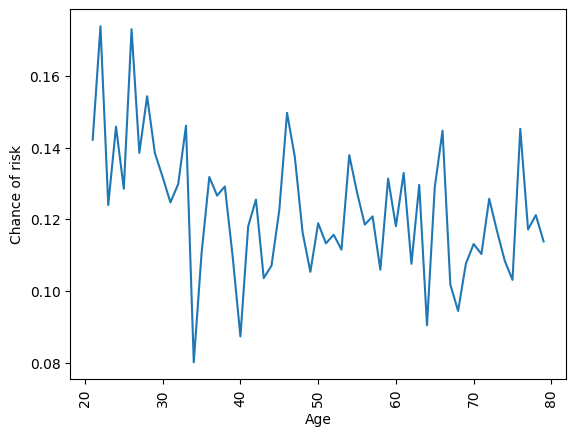

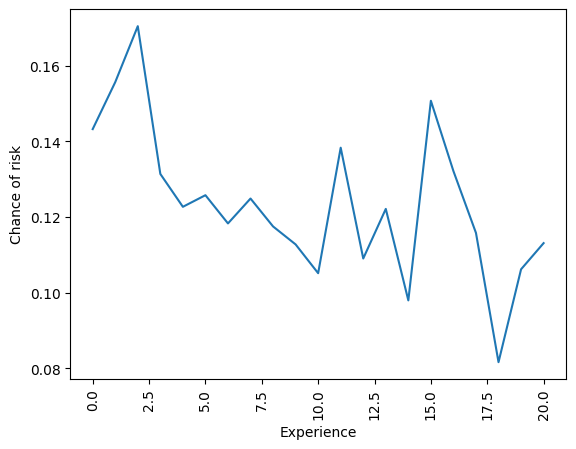

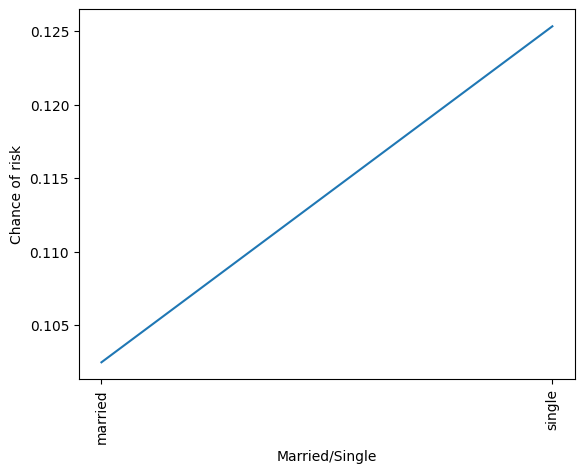

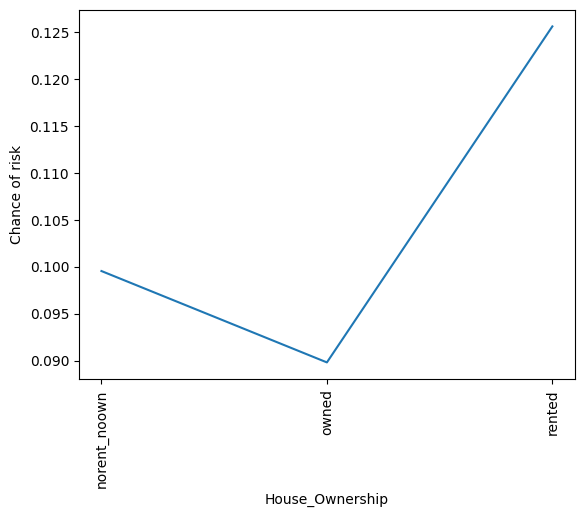

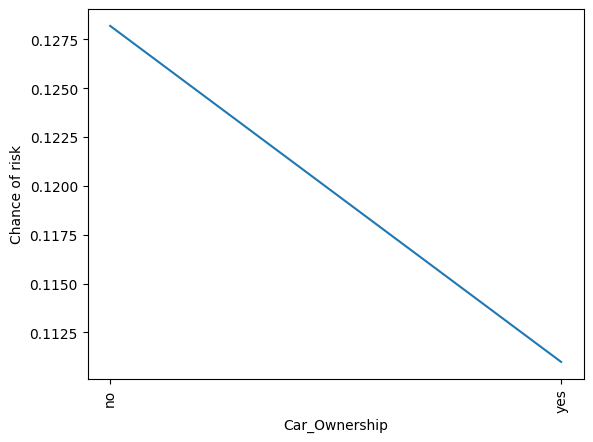

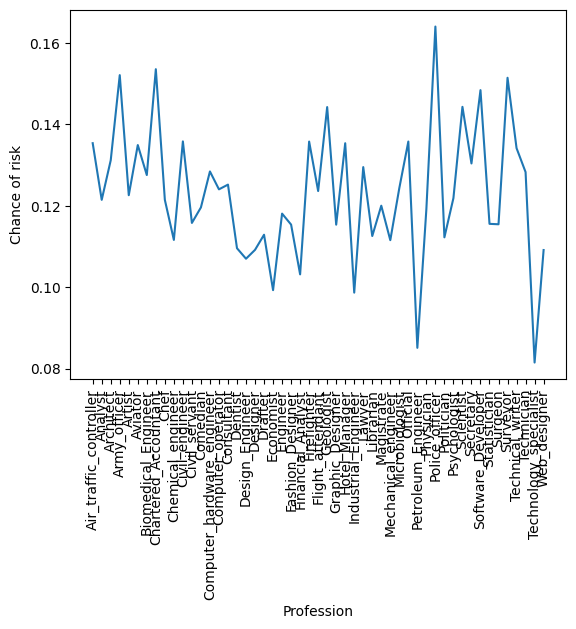

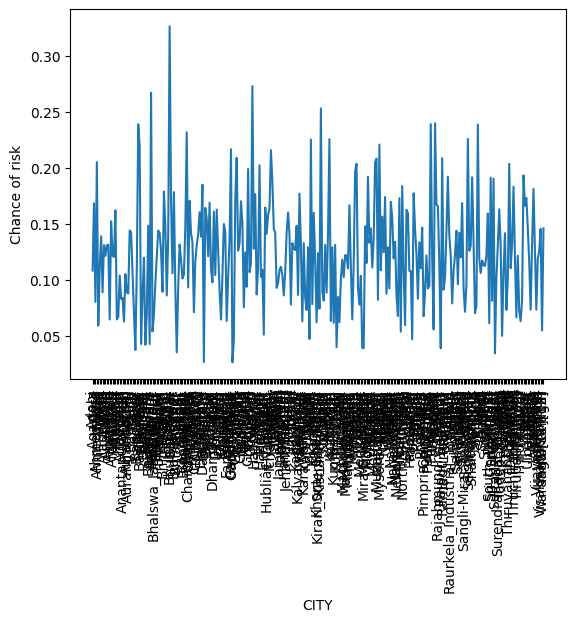

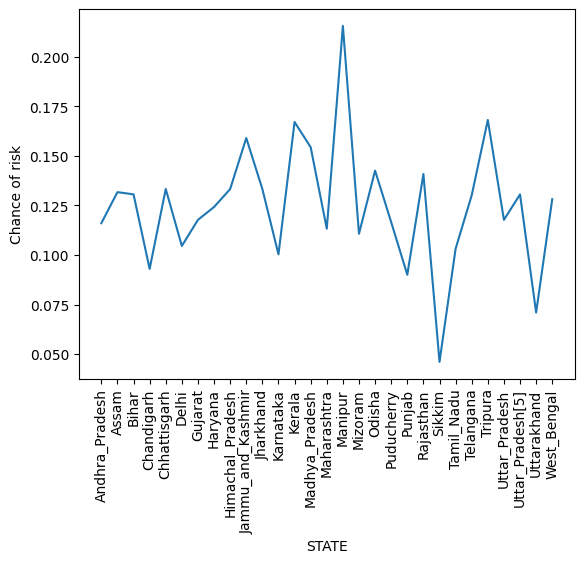

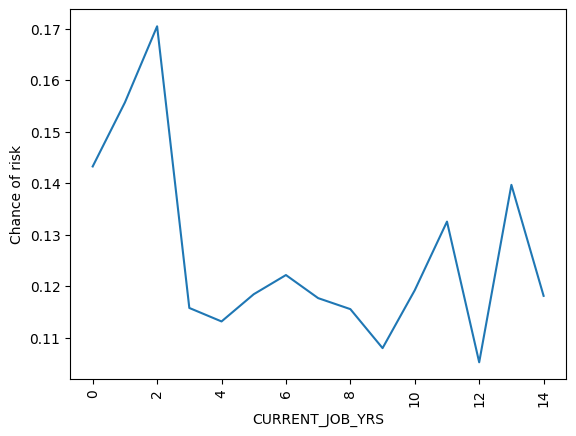

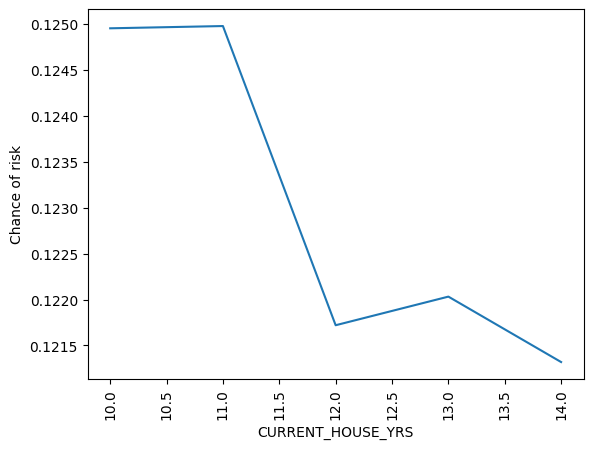

In [95]:
for column in df_train.columns:
    if column not in ['Id','Risk_Flag', 'Income', 'Married/Single', 'House_Ownership', 'Car_Ownership']:
        df_risk_by_attrib = df_train[[column,'Risk_Flag']].groupby([column]).mean()
        
        fig,ax = plt.subplots()
        
        ax.plot(df_risk_by_attrib.index, df_risk_by_attrib['Risk_Flag'])
            
        plt.xticks(rotation='vertical')
        plt.ylabel('Chance of risk')
        plt.xlabel(column)

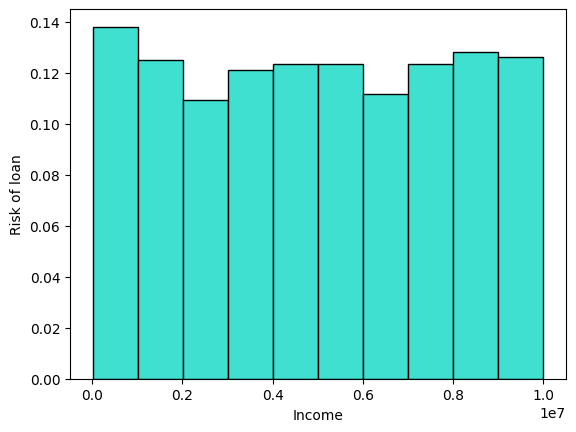

In [84]:
income = df_train['Income'].to_numpy()
risk = df_train['Risk_Flag'].to_numpy()
bins = np.linspace(np.min(income), np.max(income) + 1e-12, 11)
c = np.digitize(income, bins)

plt.bar(bins[:-1], [np.mean(risk[c == i]) for i in range(1, len(bins))], width=bins[1]-bins[0], align='edge', fc='turquoise',ec='black')

#plt.hist(df_train['Income'], df_train['Risk_Flag'])
plt.xlabel('Income')
plt.ylabel('Risk of loan')
plt.show()
# df_train[['Income', 'Risk_Flag']]

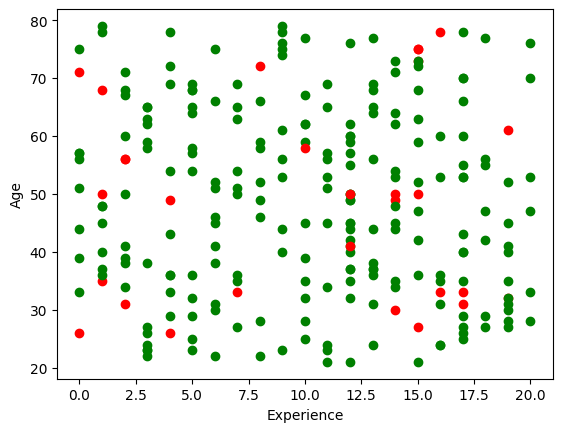

In [100]:
age_and_income = df_train[['Experience','Age','Risk_Flag']].to_numpy()

for client in age_and_income[::1000]:
    # print(client)
    if client[2] == 1:
        plt.plot(client[0], client[1], 'ro')
    else:
        plt.plot(client[0], client[1], 'go')
        
plt.xlabel('Experience')
plt.ylabel('Age')
plt.show()

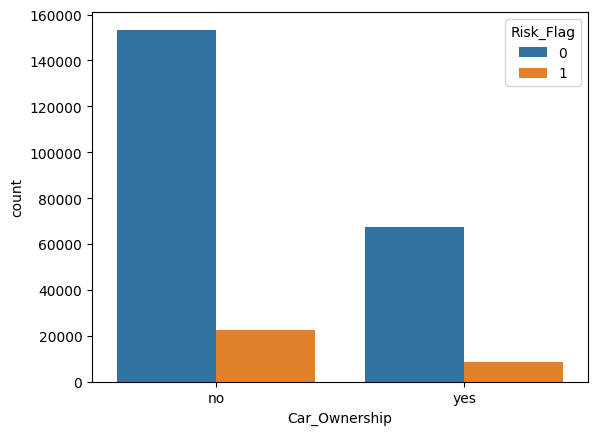

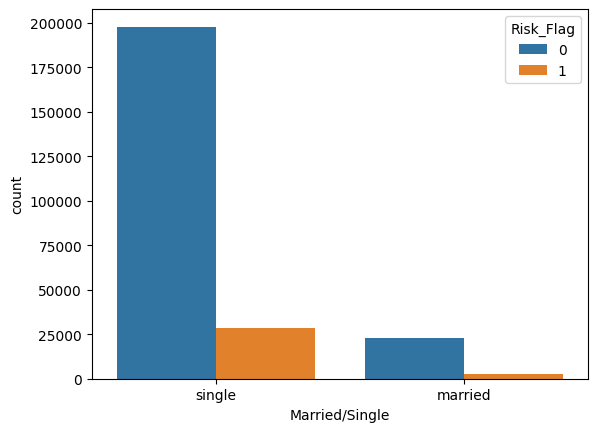

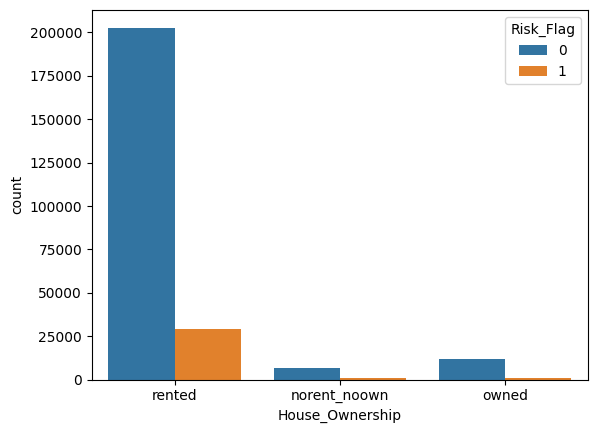

In [108]:
for attrib in ['Car_Ownership','Married/Single', 'House_Ownership']:
    sns.countplot(x=attrib, hue='Risk_Flag', data=df_train)
    plt.show()

## Training

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Risk_Flag',axis=1), df_train['Risk_Flag'], test_size=0.2,random_state=109)

print(x_train.shape)
print(x_test.shape)

(201600, 12)
(50400, 12)


In [6]:
# Transforming textual attributes to numerical with LabelEncoder
for i, dtype in enumerate(x_train.dtypes):
    if dtype == 'object':
        le = LabelEncoder()
        x_train.iloc[:,i] = le.fit_transform(x_train.iloc[:,i])

In [7]:
x_train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
190990,190991,394382,64,6,1,2,1,38,35,19,6,13
193343,193344,1737928,28,8,1,2,0,10,285,23,8,10
122760,122761,499939,25,17,0,2,1,8,34,25,9,14
191065,191066,4806237,79,10,0,2,0,48,10,26,4,11
44890,44891,61219,24,7,1,2,0,45,22,2,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...
16368,16369,2603179,39,20,1,2,1,39,275,2,13,11
213133,213134,7458144,26,13,1,2,1,47,27,25,7,11
138997,138998,4278856,59,12,1,2,0,20,303,11,4,11
19701,19702,1874022,44,15,1,2,0,33,291,22,7,14


In [ ]:
clf = svm.SVC(kernel='linear', verbose=True) # Linear Kernel

clf.fit(x_train, y_train)

[LibSVM]............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................